# M044_2024_12_04_09_30

Session: M044_2024_12_04_09_30

In [24]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal

from tools.dsp.preprocessing import preprocess
import tools.viz.rasters as rt
from tools.params import Params
from tools.viz.dimensionality import plot_VAF
from tools.dataTools import get_data_array

from tools.dimensionality.utils import participation_ratio, pca_pr
from tools.params import colors


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# TODO: add example data to the repo and run on that
data_dir = "/data/bnd-data/raw/M044/M044_2024_12_04_09_30"
fname = os.path.join(data_dir, "M044_2024_12_04_09_30_pyaldata.mat")

In [27]:
# load TrialData .mat file into a DataFrame
df = pyal.mat2dataframe(fname, shift_idx_fields=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


## Preprocessing from utils

In [28]:
df_ = preprocess(df, only_trials=False)

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 20000)


## Plotting

In [62]:
df_ = pyal.select_trials(df_, "idx_trial_end > 30365")  # Remove first 5 minutes because the switch was off

In [63]:
df_.head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,idx_Sol_duration,idx_sol_on,idx_earthquake_duration,idx_session_timer,all_chan_best,all_unit_guide,all_KSLabel,all_spikes,all_rates,sol_level_id
0,M044,M044_2024_12_04_09_30,82,trial,401,0.03,30233,30366,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 2.798774, 0.0, 0.91412437, 0....",1
1,M044,M044_2024_12_04_09_30,84,trial,401,0.03,30399,30533,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.003973114, 0.0, 0.0, 0.0, 0.91444397,...",1
2,M044,M044_2024_12_04_09_30,86,trial,401,0.03,30633,30766,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[25.524176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000319...",0
3,M044,M044_2024_12_04_09_30,88,trial,401,0.03,30933,31066,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[1.4142135623730951, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[18.313324, 0.0, 0.0, 0.003973114, 0.0, 0.0, ...",1
4,M044,M044_2024_12_04_09_30,90,trial,401,0.03,31099,31233,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24716315, 0....",0


In [12]:
df_.values_Sol_direction == 1

0      False
1      False
2       True
3      False
4      False
       ...  
488    False
489    False
490    False
491     True
492    False
Name: values_Sol_direction, Length: 493, dtype: bool

- Trial 90 has some nice spikes

In [29]:
areas = ["M1", "Dls"]
df_["M1_rates"] = [df_["all_rates"][i][:,300:] for i in range(len(df_))]
df_["Dls_rates"] = [df_["all_rates"][i][:,0:300] for i in range(len(df_))]

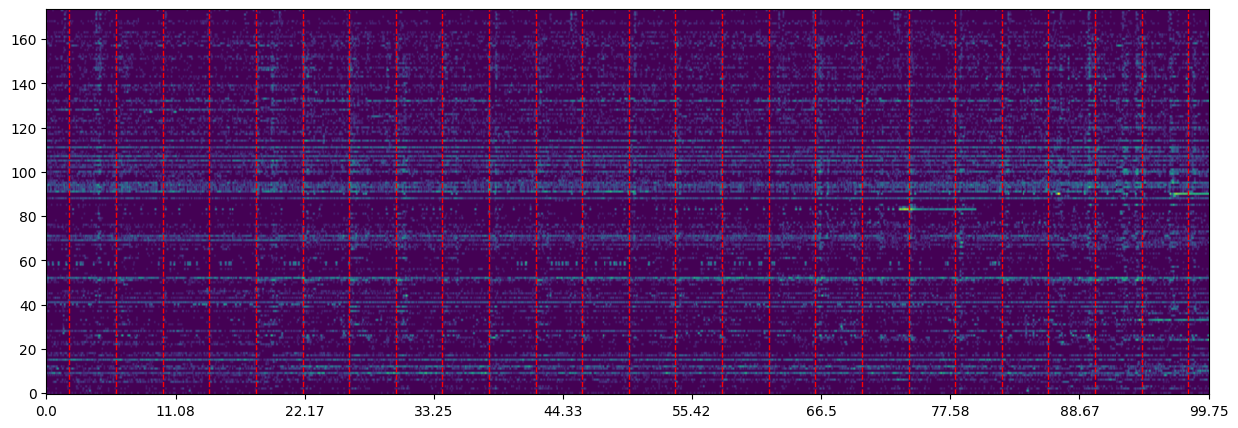

In [36]:
fig, axes = plt.subplots(1, figsize=(15, 5), sharey=True)

# axes.imshow(rates.T, aspect="auto")
area="M1"
rt.plot_heatmap_raster(df_[25:50], area=area,ax=axes, show=False, add_sol_onset=True)
plt.show()

# rates.shape

In [ ]:
df__ = pyal.select_trials(df_, df.values_Sol_duration == 150)
for trial in range(8):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 5))
    axes = rt.plot_fr_raster(df__, axes, Params.sol_dir_to_level.keys(), trial=trial, area='Dls')
plt.show()
# 


In [ ]:
df__ = pyal.select_trials(df_, df.values_Sol_duration == 150)
for trial in range(8):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 3))
    axes = rt.plot_fr_raster(df__, axes, Params.sol_dir_to_level.keys(), trial=trial, area='M1')
plt.show()
# 


## VAF

In [86]:
data_list = [pyal.select_trials(df_, df_.trial_name == 'trial')]
areas = ["M1", "Dls"]
n_components = None
epoch = None
model = "pca"

[0.17085778 0.10937419 0.04184729 0.03272578 0.01876894]


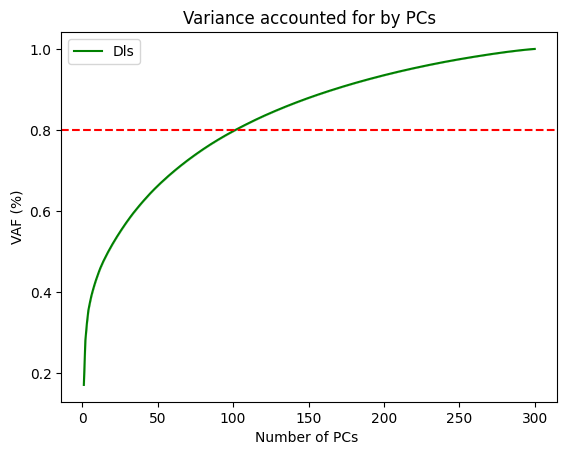

In [82]:
# VAF for each area in areas list, averaged across sessions in data_list, with shaded errorbars.
fig, ax = plt.subplots()
ax = plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model, show=False)

In [80]:
df_intertrial = preprocess(df, only_trials=False)
df_intertrial = pyal.select_trials(df_intertrial, df_intertrial.trial_name == "intertrial")


/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.10/lib/python3.10/site-packages/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 20000)


In [54]:
df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
trial_data = pyal.concat_trials(df_trials, f"{area}_rates")
print(trial_data.shape)

(70889, 300)


Applying query
533
493


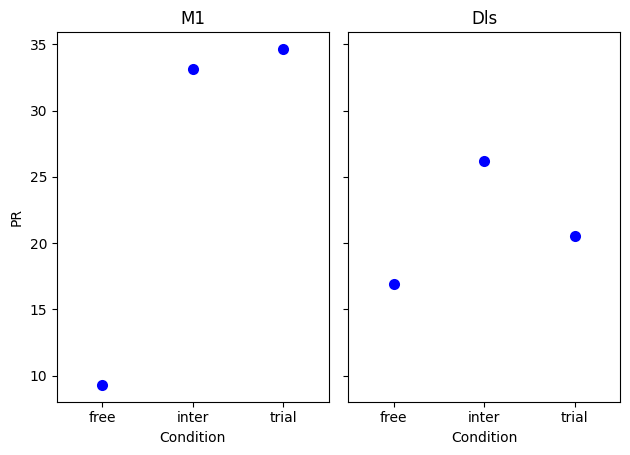

{'M1': {'free': [9.307704324050752], 'inter': [33.15593102937829], 'trial': [34.64632958367636]}, 'Dls': {'free': [16.90021268823484], 'inter': [26.238020729616437], 'trial': [20.552126730193052]}}


In [36]:
# TODO: Refactor into function
from sklearn.decomposition import PCA

def plot_participation_ratio_per_session(df, areas, epoch = None, trial_query = None, intertrial_query = None, title=None):
    results = {area: {'free': [], 'inter': [], 'trial': []} for area in areas}

    df_trials = pyal.select_trials(df, df.trial_name == 'trial')
    df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]


    df_intertrials = pyal.select_trials(df, df.trial_name == 'intertrial')
    df_free = pyal.select_trials(df, df.trial_name == 'free')


    if epoch is not None:
        df_trials = pyal.restrict_to_interval(df_trials, epoch_fun=epoch)

    if trial_query is not None:
        print("Applying query")
        print(len(df_trials))
        df_trials = pyal.select_trials(df_trials, trial_query)
        print(len(df_trials))


    for area in areas:
        free_data = pyal.concat_trials(df_free, f"{area}_rates")
        results[area]['free'].append(pca_pr(free_data))

        trial_data = pyal.concat_trials(df_trials, f"{area}_rates")
        results[area]['trial'].append(pca_pr(trial_data))

        intertrial_data = pyal.concat_trials(df_intertrials, f"{area}_rates")
        results[area]['inter'].append(pca_pr(intertrial_data))

    

    fig, axes = plt.subplots(1, len(areas), sharey=True)

    for i, area in enumerate(areas):
        data = pd.DataFrame({
            'PR': results[area]['free'] + results[area]['inter'] + results[area]['trial'],
            'Condition': ['free'] * len(results[area]['free']) + ['inter'] * len(results[area]['inter']) + ['trial'] * len(results[area]['trial'])
        })
        sns.stripplot(data=data, x='Condition', y='PR', s=8, color='blue', ax=axes[i])
        axes[i].set_title(area)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    print(results)


areas = ["M1", "Dls"]
plot_participation_ratio_per_session(df_, areas, trial_query="idx_trial_end > 30000")


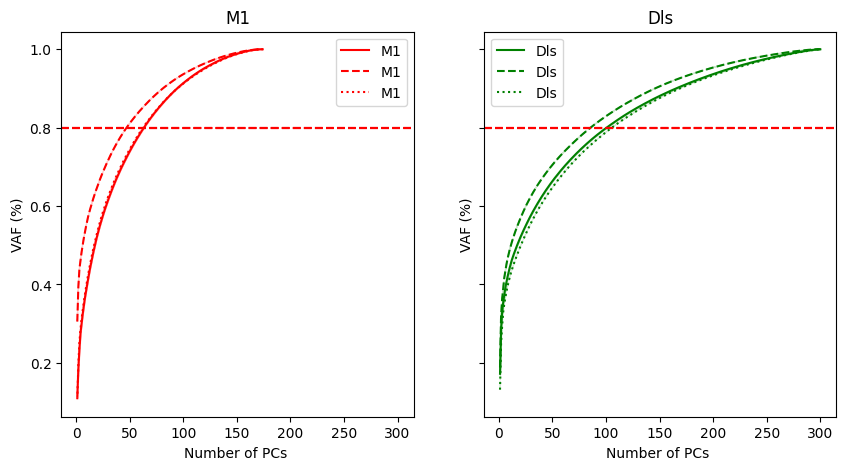

In [35]:
n_components = None
epoch=None
model = "pca"

df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_trials = pyal.select_trials(df_trials, "idx_trial_end > 30000")
df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

df_intertrials = pyal.select_trials(df_, df_.trial_name == 'intertrial')
df_free = pyal.select_trials(df_, df_.trial_name == 'free')

fig, axes = plt.subplots(1, len(areas), figsize=(10, 5), sharey='all', sharex='all')
for area, ax in zip(areas, axes):
    ax1 = plot_VAF(ax = ax, data_list = [df_trials], areas = area, n_components = n_components, epoch = epoch, model = model, show=False)
    ax1 = plot_VAF(ax = ax, data_list = [df_free], areas = area, n_components = n_components, epoch = epoch, model = model, show=False, linestyle='--')
    ax1 = plot_VAF(ax = ax, data_list = [df_intertrials], areas = area, n_components = n_components, epoch = epoch, model = model, show=False, linestyle=':')


    ax.set_title(f"{area}")



plt.show()

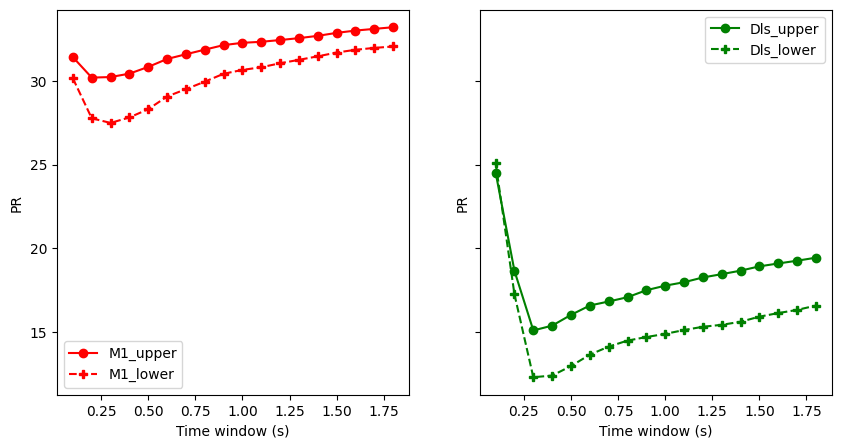

In [99]:
results = {area: {'0': [], '1': []} for area in areas}
sol_levels = [0, 1]

window_times = np.arange(start=0.1, stop=1.9, step=0.1)

for area in areas:
    for sol_level in sol_levels:
        for window_time in window_times:
            perturb_epoch = pyal.generate_epoch_fun(
                start_point_name="idx_sol_on",
                rel_start=int(-0.5 / Params.BIN_SIZE),
                rel_end=int(window_time / Params.BIN_SIZE),
            )

            df__ = pyal.restrict_to_interval(df_trials_motion, epoch_fun=perturb_epoch)
            df_specfic_sol_opening = pyal.select_trials(df__, df__.sol_level_id == sol_level)
            rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
            results[area][str(sol_level)].append(pca_pr(rates))


fig, axes = plt.subplots(1, len(areas), figsize=(10, 5), sharey='all')
for area, ax in zip(areas, axes):

    ax.plot(window_times, results[area]['0'], color=getattr(colors, area), label=f"{area}_upper", marker='o', linestyle='-')
    ax.plot(window_times, results[area]['1'], color=getattr(colors, area), label=f"{area}_lower", marker='P', linestyle='--')
    ax.legend()
    # ax.set_xticklabels(['Upper', 'Lower'])
    ax.set_xlabel('Time window (s)')
    ax.set_ylabel('PR')


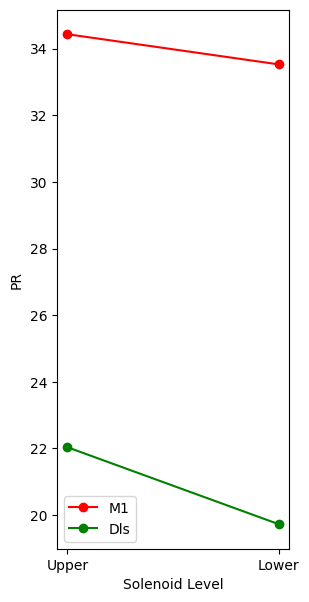

In [47]:
results = {area: [] for area in areas}
sol_levels = [0, 1]

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

for area in areas:
    for sol_level in sol_levels:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.sol_level_id == sol_level)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area].append(pca_pr(rates))

fig, ax = plt.subplots(1, figsize=(3, 7))
for area in areas:
    ax.plot(sol_levels, results[area], color=getattr(colors, area), label=area, marker='o', linestyle='-')
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Upper', 'Lower'])
    ax.set_xlabel('Solenoid Level')
    ax.set_ylabel('PR')

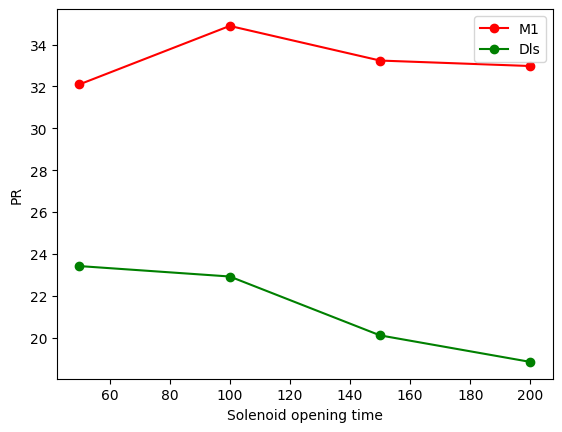

In [103]:
results = {area: [] for area in areas}
sol_openings = np.unique(df_trials.values_Sol_duration)


for area in areas:
    for sol_opening in sol_openings:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.values_Sol_duration == sol_opening)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area].append(pca_pr(rates))

fig, ax = plt.subplots(1)
for area in areas:
    ax.plot(sol_openings, results[area], color=getattr(colors, area), label=area, marker='o', linestyle='-')
    ax.legend()
    ax.set_xlabel('Solenoid opening time')
    ax.set_ylabel('PR')


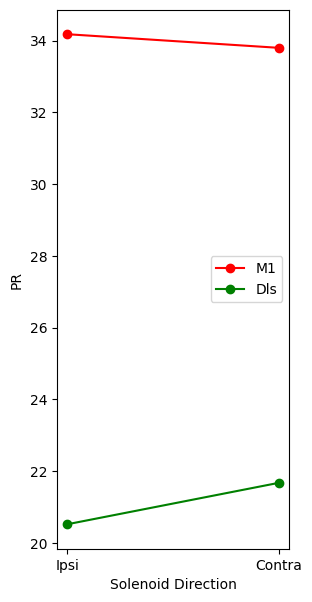

In [104]:
results = {area: [] for area in areas}
sols_ipsi_contra = [0, 1]

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

for area in areas:
    for sol_ipsi_contra in sols_ipsi_contra:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.sol_contra_ipsi == sol_ipsi_contra)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area].append(pca_pr(rates))

fig, ax = plt.subplots(1, figsize=(3, 7))
for area in areas:
    ax.plot(sol_levels, results[area], color=getattr(colors, area), label=area, marker='o', linestyle='-')
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Ipsi', 'Contra'])
    ax.set_xlabel('Solenoid Direction')
    ax.set_ylabel('PR')

### Trials

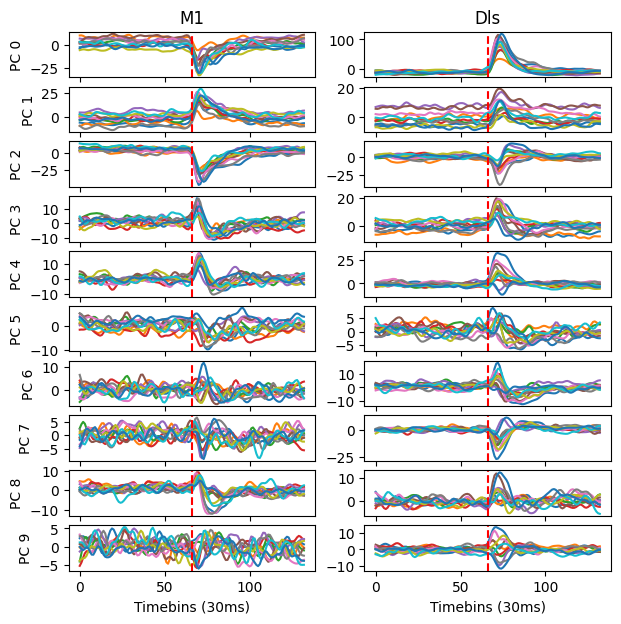

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

areas = ["M1", "Dls"]
dfs = []
axes = []
category = "values_Sol_direction"
trial_types = ['trial']
epoch = None
n_components = 10

df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

df_int = df_trials_motion[:-1]

timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
targets = np.unique(df_trials_motion[category])


fig, axes = plt.subplots(n_components, n_cols, figsize=(7, 7), sharex='all')
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# ex = pyal.get_sig_by_trial(df_trials_motion, '_pca')
# ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
# axes[-1, 0].plot()

# plt.tight_layout()
plt.show()

### Intertrials

In [13]:
pyal.select_trials(df_, "trial_name == 'intertrial'").head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,idx_session_timer,all_chan_best,all_unit_guide,all_KSLabel,all_spikes,all_rates,sol_level_id,sol_contra_ipsi,M1_rates,Dls_rates
0,M044,M044_2024_12_04_09_30,1,intertrial,101,0.03,19999,20033,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[9.000157, 0.0, 0.0, 0.0, 12.949476, 2.798774...",NaN,NaN,"[[0.0, 0.043432135, 0.0, 0.0, 0.0, 20.365671, ...","[[9.000157, 0.0, 0.0, 0.0, 12.949476, 2.798774..."
1,M044,M044_2024_12_04_09_30,3,intertrial,101,0.03,20166,20199,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[10.21812, 0.0, 0.0, 0.00031967516, 0.0039731...",NaN,NaN,"[[0.034771092, 0.0, 0.0, 0.0, 0.0, 24.713465, ...","[[10.21812, 0.0, 0.0, 0.00031967516, 0.0039731..."
2,M044,M044_2024_12_04_09_30,5,intertrial,101,0.03,20333,20366,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0060709203, 0.0, 0.91412437, 6.201384, 0.0...",NaN,NaN,"[[0.034771092, 33.160137, 7.115508, 0.0, 0.0, ...","[[0.0060709203, 0.0, 0.91412437, 6.201384, 0.0..."
3,M044,M044_2024_12_04_09_30,7,intertrial,701,0.03,20499,20733,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[6.2420936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.212392...",NaN,NaN,"[[0.0, 0.0, 16.631895, 8.770401, 0.0, 14.27209...","[[6.2420936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.212392..."
4,M044,M044_2024_12_04_09_30,9,intertrial,501,0.03,20866,21033,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.9145764, 0.0, 0.0, 0.0, 10.21812...",NaN,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 16.631895, 0.0, 0.0...","[[0.0, 0.0, 0.9145764, 0.0, 0.0, 0.0, 10.21812..."


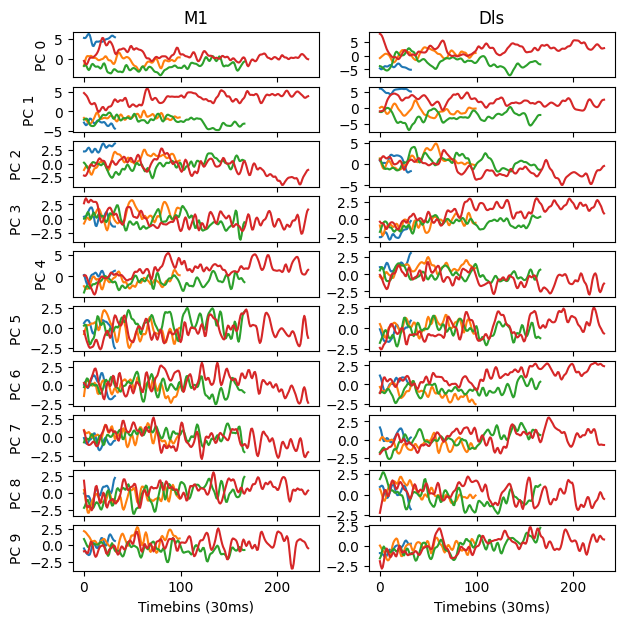

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "trial_length"
trial_types = ['trial']
epoch = None
n_components = 10

df_intertrials = pyal.select_trials(df_, "trial_name == 'intertrial'")
trial_lengths = np.unique(df_intertrials.trial_length.values)




n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas


fig, axes = plt.subplots(n_components, n_cols, figsize=(7, 7), sharex='all')
# # df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")

df___ = df_intertrials
# # Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)


# # Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df___[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df___, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for trial_length in trial_lengths:
            df_tmp = pyal.select_trials(df___, df___[category] == trial_length)
            ex = pyal.get_sig_by_trial(df_tmp, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])            


        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")


# plt.tight_layout()
plt.show()

In [124]:
df_trials_motion.columns

Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes', 'all_rates',
       'sol_level_id', 'sol_contra_ipsi', 'M1_rates', 'Dls_rates'],
      dtype='object')

### Pooling upper and lower level. Upper -> Orange

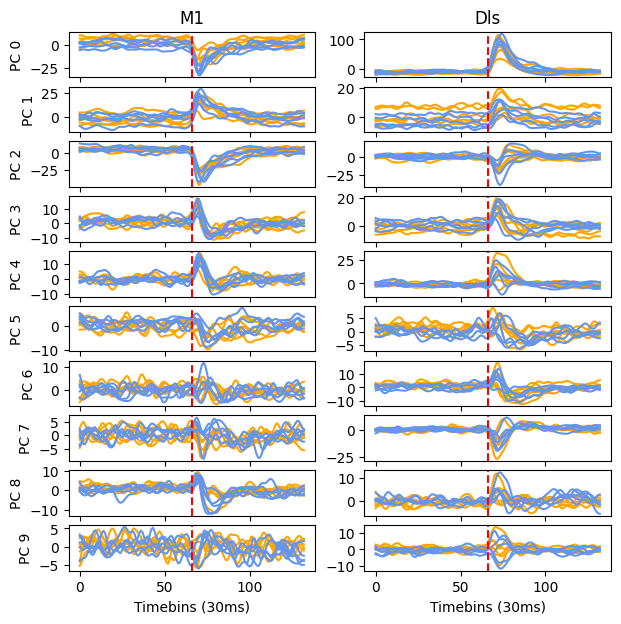

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
trial_types = ['trial']
epoch = None
n_components = 10

df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

df_int = df_trials_motion[:-1]

timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
targets = np.unique(df_trials_motion[category])


fig, axes = plt.subplots(n_components, n_cols, figsize=(7, 7), sharex='all')
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            level = 'upper' if Params.sol_dir_to_level[tar] == 0 else 'lower'
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row], color=getattr(colors, level))
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

### Pooling contra and ipsi. Contra --> RED

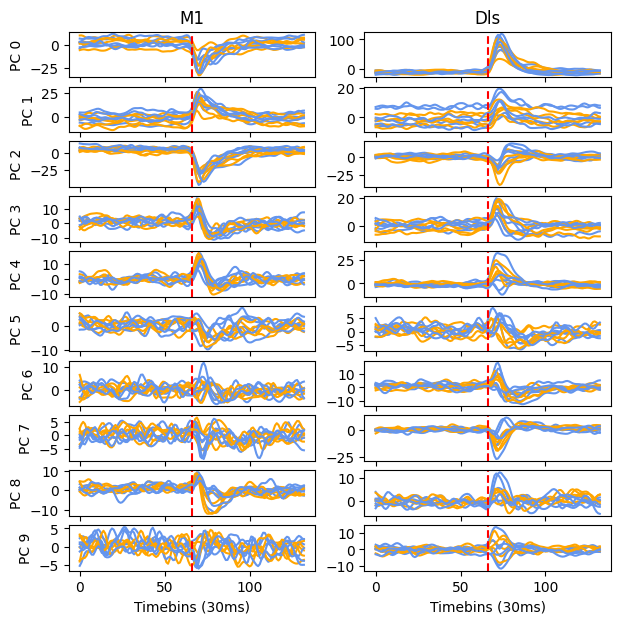

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
trial_types = ['trial']
epoch = None
n_components = 10

df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

df_int = df_trials_motion[:-1]

timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
targets = np.unique(df_trials_motion[category])


fig, axes = plt.subplots(n_components, n_cols, figsize=(7, 7), sharex='all')
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            side = 'ipsi' if Params.sol_dir_to_contra_ipse[tar] == 0 else 'contra'
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row], color=getattr(colors, side))
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Chi-squared over time. Window size: 100')

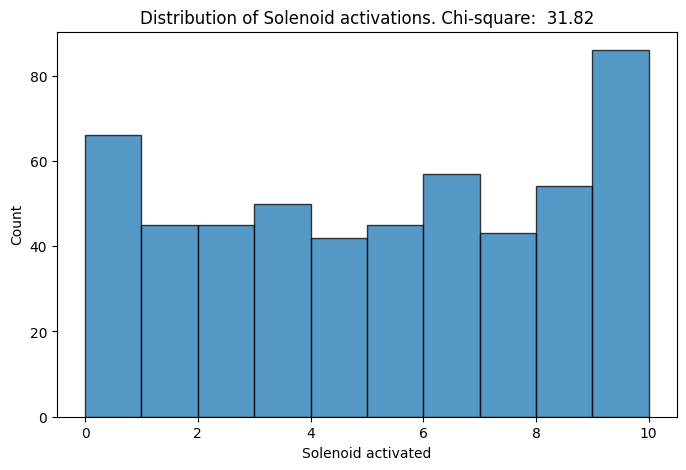

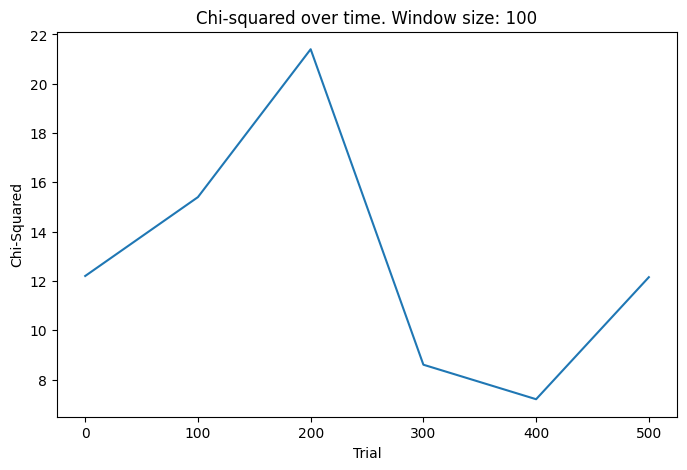

In [27]:
def histogram_deviation(data, num_bins=10):
    """
    Computes the deviation of a histogram from being perfectly homogeneous.
    
    Parameters:
        data (list or np.array): The data points to be histogrammed.
        num_bins (int): Number of bins in the histogram.
    
    Returns:
        dict: Contains Chi-Square Statistic and Mean Absolute Deviation (MAD).
    """
    # Compute histogram
    hist, bin_edges = np.histogram(data, bins=num_bins)
    
    # Expected frequency for uniform distribution
    expected_freq = len(data) / num_bins
    
    # Compute Chi-Square Statistic
    chi_square_stat = np.sum(((hist - expected_freq) ** 2) / expected_freq)
    return chi_square_stat


df_trials = pyal.select_trials(df_, df.trial_name == "trial")


plt.figure(figsize=(8, 5))
plt.hist(df_trials['values_Sol_direction'].values, edgecolor='black', alpha=0.75)

# Labels and title
plt.xlabel('Solenoid activated')
plt.ylabel('Count')
chi_square_stat = histogram_deviation(df_trials['values_Sol_direction'].values)
plt.title(f'Distribution of Solenoid activations. Chi-square: {chi_square_stat: .2f}')

chi_over_time = []
window_size = 100  # 5 minutes, 75 4s trials
window_starts = np.arange(0, len(df_trials), step=window_size)
for window_start in window_starts:
    df_tmp = df_trials[window_start: window_start + window_size]
    data = df_tmp['values_Sol_direction'].values
    chi_over_time.append(histogram_deviation(data))

    # plt.figure(figsize=(8, 5))
    # plt.hist(data, edgecolor='black', alpha=0.75)

    # # Labels and title
    # plt.xlabel('Solenoid activated')
    # plt.ylabel('Count')
    # chi_square_stat = histogram_deviation(data)
    # plt.title(f'Distribution of Solenoid activations. Chi-square: {chi_square_stat: .2f}')

plt.figure(figsize=(8, 5))
plt.plot(window_starts, chi_over_time)
# Labels and title
plt.xlabel('Trial')
plt.ylabel('Chi-Squared')
plt.title(f'Chi-squared over time. Window size: {window_size}')


In [58]:
np.unique(df_trials.values_Sol_direction)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

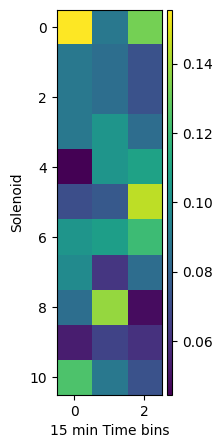

In [77]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


df_trials = pyal.select_trials(df_, df.trial_name == "trial")


counts_mat = []
window_size = 225  # 5 minutes, 75 4s trials
window_starts = np.arange(0, len(df_trials), step=window_size)
for window_start in window_starts:
    df_tmp = df_trials[window_start: window_start + window_size]
    data = df_tmp['values_Sol_direction'].values
    counts, edges = np.histogram(data, bins=11)
    counts_mat.append(counts / np.sum(counts))


counts_mat = np.vstack(counts_mat)

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(counts_mat.T)
ax.set_ylabel("Solenoid")
ax.set_xlabel("15 min Time bins")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)



### CCAs

In [56]:
from tools.dimensionality.cca import canoncorr

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 8)  # 100 samples, 5 features
Y = np.random.rand(100, 5)  # 100 samples, 3 features

A, B, r, U, V = canoncorr(X, Y, fullReturn=True)


In [ ]:
df_trials = pyal.select_trials(df_, df.trial_name == 'trial')
df_trials = pyal.restrict_to_interval(df_trials, Params.perturb_epoch)



AllData_M1 = get_data_array(df_trials, area='M1', model="pca")
AllData_Dls = get_data_array(df_trials, area='Dls', model="pca")
AllData = np.vstack([AllData_M1, AllData_Dls])  # Shape = (2, 11, 32, 133, 10) Areas, targets, trials, timepoints, components

data1 = np.reshape(AllData[0,...], (-1,10))  # Concatenate everything
data2 = np.reshape(AllData[1,...], (-1,10))

A,B,*_ = canoncorr(data1,data2,fullReturn=True)
coef_ = [A,B]




In [59]:
A.shape

(10, 10)